# Notebook 5: Develop Convolutional Model

In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different convolutional models by using Tensorflow and Keras.

# Tokenization and padding sequences

In [1]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [2]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [3]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [4]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

2023-07-25 16:33:12.264845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using the global nlp function to visualise the padded sequences.

In [5]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [6]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [7]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [8]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [9]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


Before developing models, it sets up a global function to visualise the validation during the training and validation process.

In [10]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [12]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

# Convolution model

Convolutional models have a CNN architecture, which is good at capturing local patterns and short-term patterns. In sentiment analysis, CNN models are good at capturing the specific combination of words, n-grams, linguistic expressions, etc. Due to its architecture, CNN trains the model faster than an RNN model. However, it cannot capture long-term dependencies such as contextual information in sentiment analysis.

The hyperparameter 'filters' can be seen as the learnable parameter sets that the convolutional layer will learn from the input data. Each filter can extract local patterns. Increasing the 'filters' hyperparameter can enhance the model's complexity to capture diverse features.

The 'kernel size' can specify the dimensions of the convolutional filters on the input data. In general, it specifies the width of a 1D convolutional filter. A large kernel size indicates a large context in the filter. In sentiment analysis, increasing the kernel size can capture a wider range of neighboring words and more contextual information.

## 1st Convolution Model 

In [13]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 64 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 64 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [14]:
# Build the model
conv_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            32000     
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 77,379
Trainable params: 77,379
Non-trainable params: 0
____________________________________________________

2023-07-25 16:33:43.435179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_1_history = conv_model_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 11s 2ms/step - loss: 0.5059 - accuracy: 0.7667 - val_loss: 0.4813 - val_accuracy: 0.7772
Epoch 2/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4602 - accuracy: 0.7924 - val_loss: 0.4612 - val_accuracy: 0.7936
Epoch 3/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4328 - accuracy: 0.8097 - val_loss: 0.4497 - val_accuracy: 0.8020
Epoch 4/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4112 - accuracy: 0.8224 - val_loss: 0.4405 - val_accuracy: 0.8098
Epoch 5/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3946 - accuracy: 0.8315 - val_loss: 0.4363 - val_accuracy: 0.8129
Epoch 6/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3815 - accuracy: 0.8388 - val_loss: 0.4380 - val_accuracy: 0.8151
Epoch 7/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3708 - accuracy: 0.8444 - val_loss: 0.4317 - val_ac

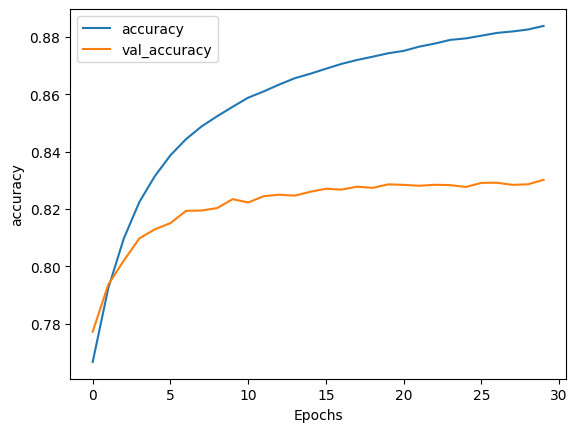

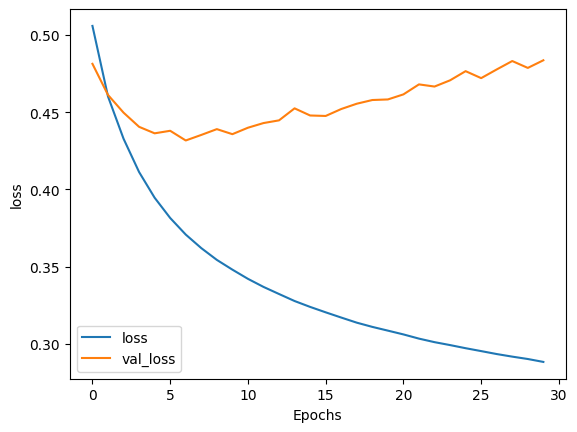

In [16]:
# Plot the accuracy and results 
plot_graphs(conv_model_1_history, "accuracy")
plot_graphs(conv_model_1_history, "loss")

The model "conv_model_1" summary:

1. Training accuracy: 88%
2. Validation accuracy: 83%
3. Total training time: around 5 mins for 30 epochs and 128 batch size.
4. Validation: Fail

Next, it create a dataframe to visualise the comparison of the models.

In [86]:
import pandas as pd

# Data for multiple rows
data = {
    "Models": ["conv_model_1"],
    "Train Acc (%)": [88],
    "Val. Acc (%)": [83],
    "Train Time (mins)": [5],
    "Validation": ["Fail"]
}

# Create a pandas DataFrame
df_comp_models = pd.DataFrame(data)

# Print the table without index numbers
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
conv_model_1             88            83                  5       Fail


## 2nd Convolutional Model

In [17]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
filters = 54 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [18]:
# Build the model
conv_model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 54)            27000     
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 54)             29214     
                                                                 
 global_average_pooling1d_1   (None, 54)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 54)                2970      
                                                                 
 dense_3 (Dense)             (None, 3)                 165       
                                                                 
Total params: 59,349
Trainable params: 59,349
Non-trainable params: 0
__________________________________________________

In [19]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_2_history = conv_model_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5092 - accuracy: 0.7652 - val_loss: 0.4847 - val_accuracy: 0.7750
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4672 - accuracy: 0.7877 - val_loss: 0.4687 - val_accuracy: 0.7882
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4434 - accuracy: 0.8033 - val_loss: 0.4578 - val_accuracy: 0.7971
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4243 - accuracy: 0.8146 - val_loss: 0.4478 - val_accuracy: 0.8032
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4098 - accuracy: 0.8230 - val_loss: 0.4427 - val_accuracy: 0.8081
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3982 - accuracy: 0.8298 - val_loss: 0.4434 - val_accuracy: 0.8094
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3885 - accuracy: 0.8347 - val_loss: 0.4409 - val_accuracy

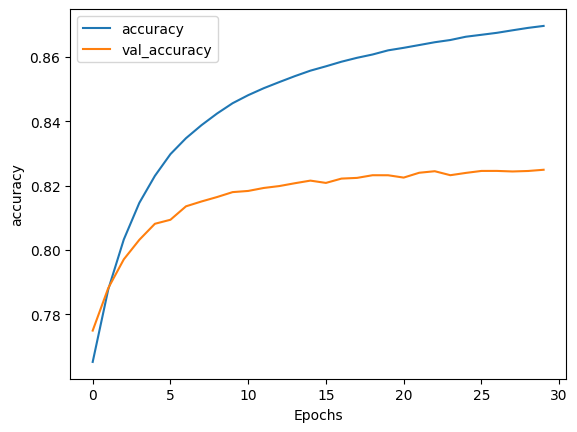

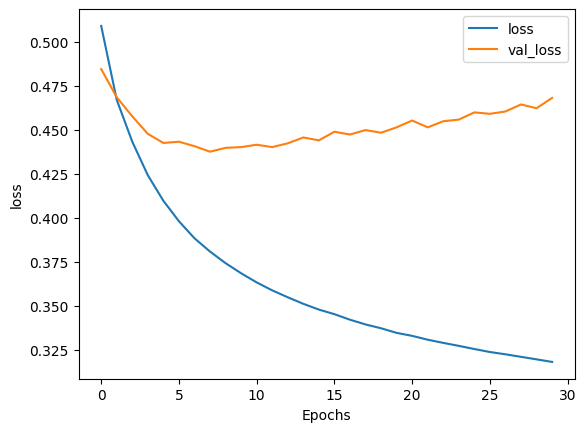

In [20]:
# Plot the accuracy and results 
plot_graphs(conv_model_2_history, "accuracy")
plot_graphs(conv_model_2_history, "loss")

The model "conv_model_2" summary:

1. Training accuracy: 87%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [82]:
# Creat a function to add row for the above models
def add_row(df, model, train_acc, val_acc, train_time, validation):
    new_row = {
        "Models": model,
        "Train Acc (%)": train_acc,
        "Val. Acc (%)": val_acc,
        "Train Time (mins)": train_time,
        "Validation": validation
    }
    df.loc[len(df)] = new_row
    return df

In [87]:
# add a new row
df_comp_models = add_row(df_comp_models, "conv_model_2", 87, 82, 4, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
conv_model_1             88            83                  5       Fail
conv_model_2             87            82                  4       Pass


## 3rd Convolutional Model

In [21]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [22]:
# Build the model
conv_model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 44)            22000     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_2   (None, 44)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 44)                1980      
                                                                 
 dense_5 (Dense)             (None, 3)                 135       
                                                                 
Total params: 43,519
Trainable params: 43,519
Non-trainable params: 0
__________________________________________________

In [23]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_history = conv_model_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5113 - accuracy: 0.7640 - val_loss: 0.4859 - val_accuracy: 0.7749
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4703 - accuracy: 0.7858 - val_loss: 0.4726 - val_accuracy: 0.7845
Epoch 3/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4512 - accuracy: 0.7982 - val_loss: 0.4624 - val_accuracy: 0.7929
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4355 - accuracy: 0.8079 - val_loss: 0.4546 - val_accuracy: 0.7985
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4240 - accuracy: 0.8150 - val_loss: 0.4529 - val_accuracy: 0.8011
Epoch 6/30
5654/5654 [==============================] - 8s 2ms/step - loss: 0.4144 - accuracy: 0.8207 - val_loss: 0.4487 - val_accuracy: 0.8042
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4070 - accuracy: 0.8251 - val_loss: 0.4487 - val_accuracy:

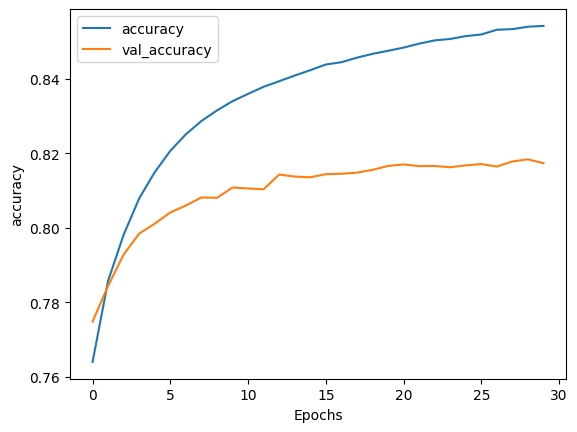

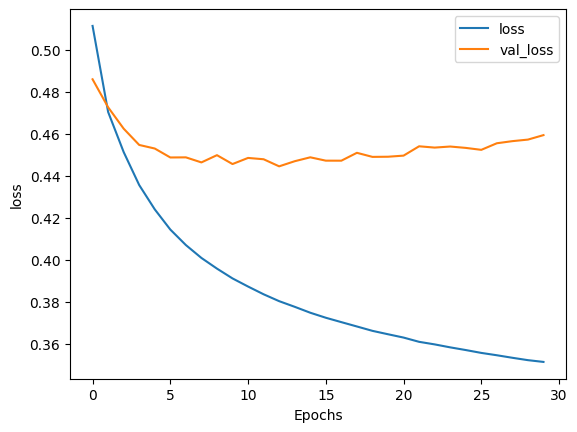

In [24]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_history, "accuracy")
plot_graphs(conv_model_3_history, "loss")

The model "conv_model_3" summary:

1. Training accuracy: 85%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [88]:
# add a new row
df_comp_models = add_row(df_comp_models, "conv_model_3", 85, 82, 4, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
conv_model_1             88            83                  5       Fail
conv_model_2             87            82                  4       Pass
conv_model_3             85            82                  4       Pass


## 4th Convolutional Model

In [25]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
filters = 34 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [26]:
# Build the model
conv_model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_4.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 34)            17000     
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 34)             11594     
                                                                 
 global_average_pooling1d_3   (None, 34)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 34)                1190      
                                                                 
 dense_7 (Dense)             (None, 3)                 105       
                                                                 
Total params: 29,889
Trainable params: 29,889
Non-trainable params: 0
__________________________________________________

In [29]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_4_history = conv_model_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3855 - accuracy: 0.8354 - val_loss: 0.4580 - val_accuracy: 0.8078
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3846 - accuracy: 0.8357 - val_loss: 0.4599 - val_accuracy: 0.8076
Epoch 3/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3841 - accuracy: 0.8363 - val_loss: 0.4572 - val_accuracy: 0.8078
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3835 - accuracy: 0.8367 - val_loss: 0.4585 - val_accuracy: 0.8080
Epoch 5/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3830 - accuracy: 0.8365 - val_loss: 0.4595 - val_accuracy: 0.8085
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3823 - accuracy: 0.8374 - val_loss: 0.4569 - val_accuracy: 0.8089
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.3819 - accuracy: 0.8374 - val_loss: 0.4591 - val_accuracy:

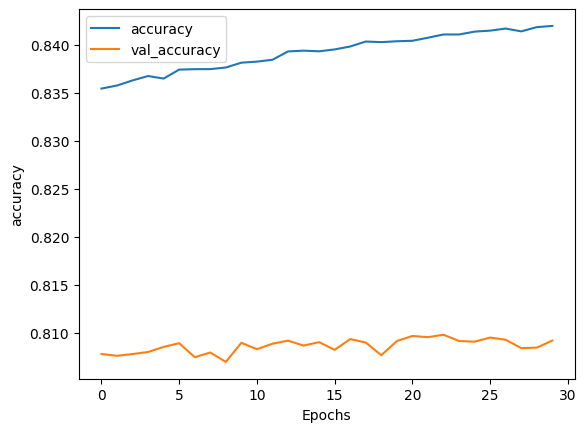

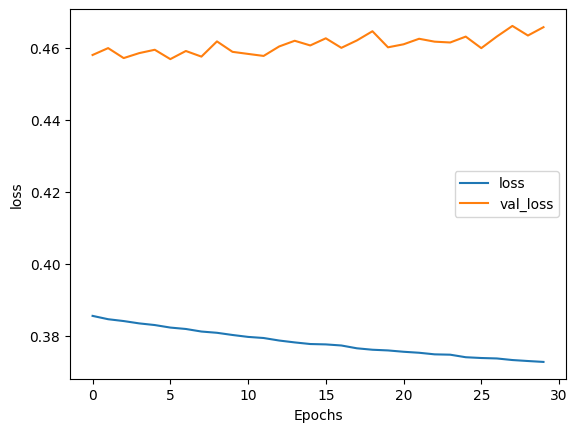

In [30]:
# Plot the accuracy and results 
plot_graphs(conv_model_4_history, "accuracy")
plot_graphs(conv_model_4_history, "loss")

The model "conv_model_4" summary:

1. Training accuracy: 84%
2. Validation accuracy: 81%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Fail

In [89]:
# add a new row
df_comp_models = add_row(df_comp_models, "conv_model_4", 84, 81, 4, "Fail")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

      Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
conv_model_1             88            83                  5       Fail
conv_model_2             87            82                  4       Pass
conv_model_3             85            82                  4       Pass
conv_model_4             84            81                  4       Fail


Overall, the conv_model_3 is the accurate and efficient model.

## Model Optimization

The above model summary shows that the model conv_model_3 may be the best model. Next, it will optimize this model.

First, it will adjust embedding_dim hyperparameter.

## 3.1 Conv Model

In [31]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [32]:
# Build the model
conv_model_3_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 64)            32000     
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 44)             28204     
                                                                 
 global_average_pooling1d_4   (None, 44)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 44)                1980      
                                                                 
 dense_9 (Dense)             (None, 3)                 135       
                                                                 
Total params: 62,319
Trainable params: 62,319
Non-trainable params: 0
__________________________________________________

In [33]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_1_history = conv_model_3_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5099 - accuracy: 0.7651 - val_loss: 0.4840 - val_accuracy: 0.7753
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4684 - accuracy: 0.7874 - val_loss: 0.4688 - val_accuracy: 0.7877
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4463 - accuracy: 0.8016 - val_loss: 0.4582 - val_accuracy: 0.7967
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4275 - accuracy: 0.8131 - val_loss: 0.4477 - val_accuracy: 0.8040
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4127 - accuracy: 0.8214 - val_loss: 0.4433 - val_accuracy: 0.8087
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4007 - accuracy: 0.8279 - val_loss: 0.4439 - val_accuracy: 0.8102
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3912 - accuracy: 0.8338 - val_loss: 0.4417 - val_accuracy:

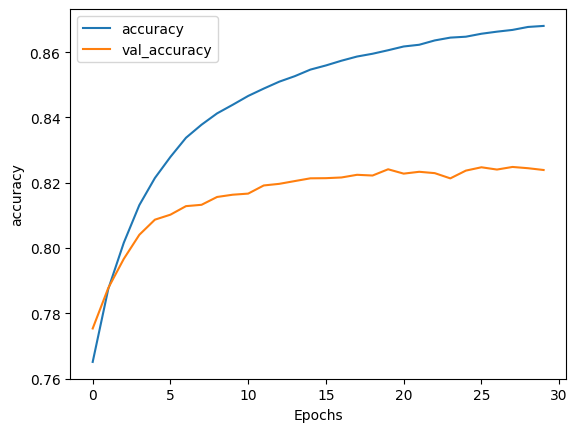

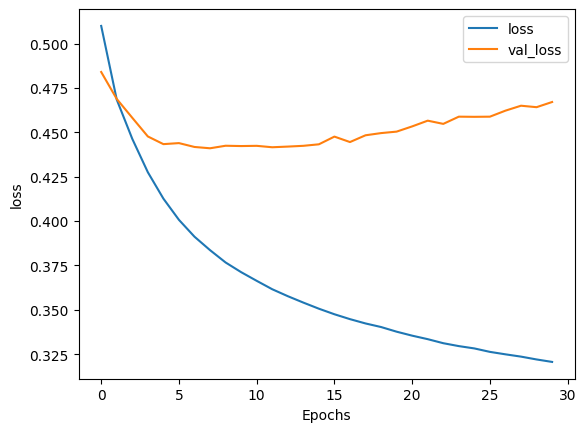

In [34]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_1_history, "accuracy")
plot_graphs(conv_model_3_1_history, "loss")

The model "conv_model_3_1" summary:

1. Training accuracy: 87%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [91]:
# Data
data = {
    "Models": ["conv_model_3"],
    "Train Acc (%)": [85],
    "Val. Acc (%)": [82],
    "Train Time (mins)": [4],
    "Validation": ["Pass"]
}

# Create a pandas DataFrame
df_opt_models = pd.DataFrame(data)

In [92]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_1", 87, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass


## 3.2 Conv Model

In [35]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [36]:
# Build the model
conv_model_3_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 54)            27000     
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 44)             23804     
                                                                 
 global_average_pooling1d_5   (None, 44)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 44)                1980      
                                                                 
 dense_11 (Dense)            (None, 3)                 135       
                                                                 
Total params: 52,919
Trainable params: 52,919
Non-trainable params: 0
__________________________________________________

In [37]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_2_history = conv_model_3_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5108 - accuracy: 0.7644 - val_loss: 0.4861 - val_accuracy: 0.7750
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4694 - accuracy: 0.7863 - val_loss: 0.4693 - val_accuracy: 0.7874
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4476 - accuracy: 0.8008 - val_loss: 0.4593 - val_accuracy: 0.7948
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4299 - accuracy: 0.8117 - val_loss: 0.4521 - val_accuracy: 0.7997
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4160 - accuracy: 0.8199 - val_loss: 0.4484 - val_accuracy: 0.8050
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4054 - accuracy: 0.8260 - val_loss: 0.4471 - val_accuracy: 0.8076
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3965 - accuracy: 0.8311 - val_loss: 0.4466 - val_accuracy:

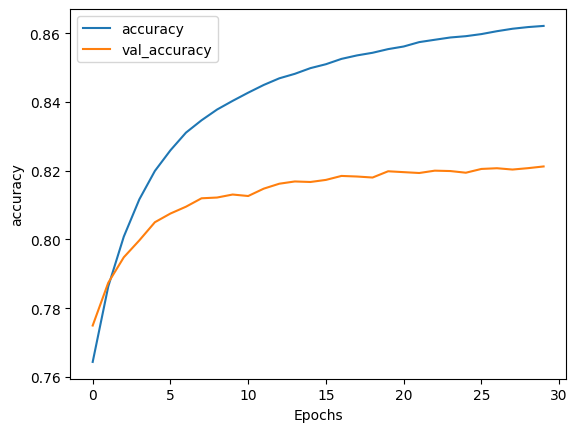

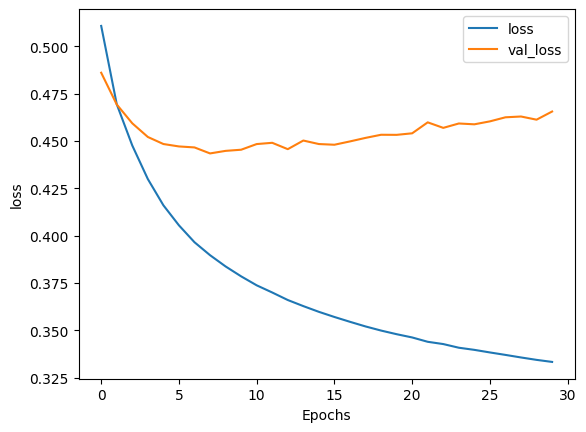

In [38]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_2_history, "accuracy")
plot_graphs(conv_model_3_2_history, "loss")

The model "conv_model_3_2" summary:

1. Training accuracy: 86%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [93]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_2", 86, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass


## 3.3 Conv Model

In [39]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [40]:
# Build the model
conv_model_3_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_3.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 34)            17000     
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 44)             15004     
                                                                 
 global_average_pooling1d_6   (None, 44)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 44)                1980      
                                                                 
 dense_13 (Dense)            (None, 3)                 135       
                                                                 
Total params: 34,119
Trainable params: 34,119
Non-trainable params: 0
__________________________________________________

In [41]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_3_history = conv_model_3_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.5132 - accuracy: 0.7628 - val_loss: 0.4882 - val_accuracy: 0.7722
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4740 - accuracy: 0.7833 - val_loss: 0.4762 - val_accuracy: 0.7823
Epoch 3/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4563 - accuracy: 0.7949 - val_loss: 0.4672 - val_accuracy: 0.7884
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4429 - accuracy: 0.8036 - val_loss: 0.4588 - val_accuracy: 0.7942
Epoch 5/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4325 - accuracy: 0.8102 - val_loss: 0.4562 - val_accuracy: 0.7975
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4240 - accuracy: 0.8150 - val_loss: 0.4544 - val_accuracy: 0.7986
Epoch 7/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4176 - accuracy: 0.8189 - val_loss: 0.4525 - val_accuracy:

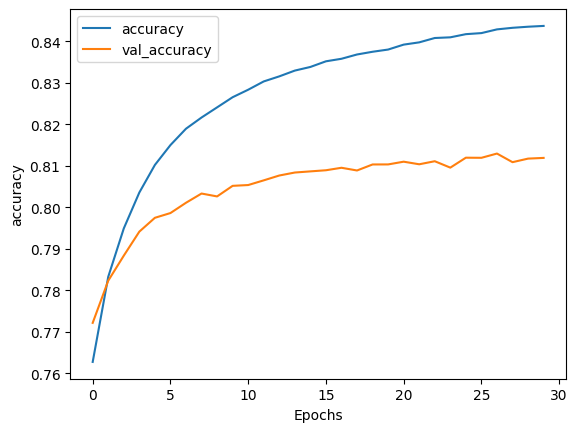

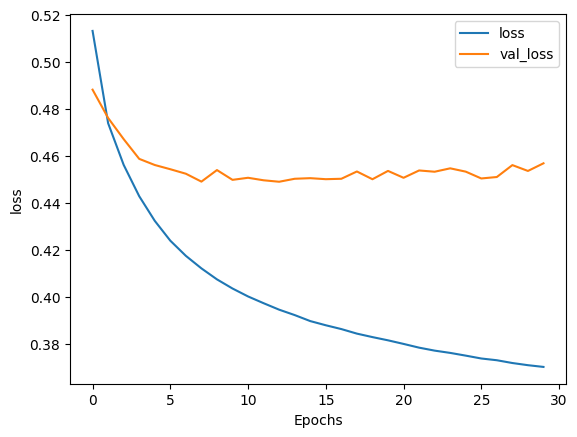

In [44]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_3_history, "accuracy")
plot_graphs(conv_model_3_3_history, "loss")

The model "conv_model_3_3" summary:

1. Training accuracy: 84%
2. Validation accuracy: 81%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [94]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_3", 84, 81, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass


## 3.4 Conv Model

In [45]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 64 # numbers of learnable parameters set
dense_dim = 44 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [46]:
# Build the model
conv_model_3_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_4.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 44)            22000     
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             28224     
                                                                 
 global_average_pooling1d_7   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 44)                2860      
                                                                 
 dense_15 (Dense)            (None, 3)                 135       
                                                                 
Total params: 53,219
Trainable params: 53,219
Non-trainable params: 0
__________________________________________________

In [47]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_4_history = conv_model_3_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5122 - accuracy: 0.7634 - val_loss: 0.4851 - val_accuracy: 0.7750
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4699 - accuracy: 0.7864 - val_loss: 0.4696 - val_accuracy: 0.7871
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4482 - accuracy: 0.7999 - val_loss: 0.4592 - val_accuracy: 0.7948
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4303 - accuracy: 0.8113 - val_loss: 0.4513 - val_accuracy: 0.8018
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4158 - accuracy: 0.8198 - val_loss: 0.4474 - val_accuracy: 0.8046
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4041 - accuracy: 0.8261 - val_loss: 0.4443 - val_accuracy: 0.8084
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3948 - accuracy: 0.8310 - val_loss: 0.4435 - val_accuracy

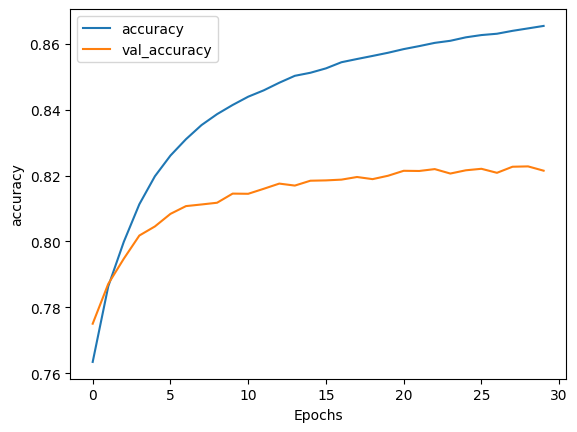

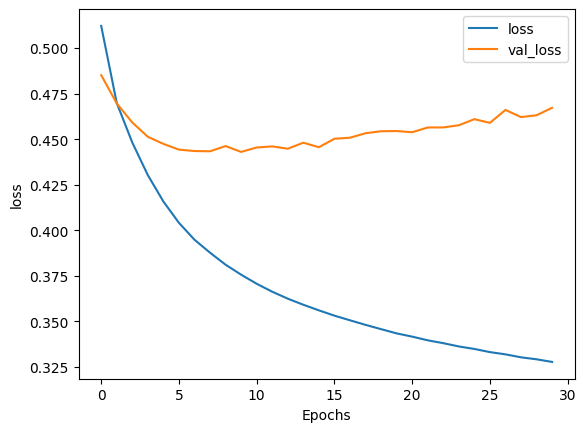

In [48]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_4_history, "accuracy")
plot_graphs(conv_model_3_4_history, "loss")

The model "conv_model_3_4" summary:

1. Training accuracy: 87%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [95]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_4", 87, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass
conv_model_3_4             87            82                  4       Pass


## 3.5 Conv Model

In [49]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 54 # numbers of learnable parameters set
dense_dim = 44 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [50]:
# Build the model
conv_model_3_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_5.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 44)            22000     
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 54)             23814     
                                                                 
 global_average_pooling1d_8   (None, 54)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 44)                2420      
                                                                 
 dense_17 (Dense)            (None, 3)                 135       
                                                                 
Total params: 48,369
Trainable params: 48,369
Non-trainable params: 0
__________________________________________________

In [51]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_5_history = conv_model_3_5.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5112 - accuracy: 0.7640 - val_loss: 0.4864 - val_accuracy: 0.7752
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4704 - accuracy: 0.7859 - val_loss: 0.4722 - val_accuracy: 0.7849
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4492 - accuracy: 0.7997 - val_loss: 0.4617 - val_accuracy: 0.7941
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4325 - accuracy: 0.8095 - val_loss: 0.4521 - val_accuracy: 0.7999
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4196 - accuracy: 0.8174 - val_loss: 0.4478 - val_accuracy: 0.8043
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4091 - accuracy: 0.8232 - val_loss: 0.4456 - val_accuracy: 0.8059
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4007 - accuracy: 0.8280 - val_loss: 0.4445 - val_accuracy:

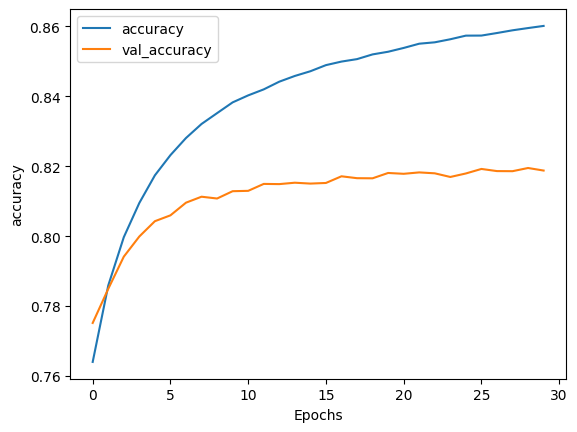

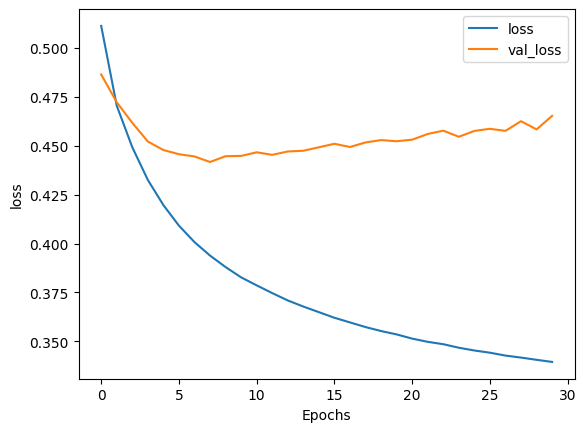

In [52]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_5_history, "accuracy")
plot_graphs(conv_model_3_5_history, "loss")

The model "conv_model_3_5" summary:

1. Training accuracy: 86%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [96]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_5", 86, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass
conv_model_3_4             87            82                  4       Pass
conv_model_3_5             86            82                  4       Pass


# 3.6 Conv Model

In [53]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 34 # numbers of learnable parameters set
dense_dim = 44 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [54]:
# Build the model
conv_model_3_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_6.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 44)            22000     
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 34)             14994     
                                                                 
 global_average_pooling1d_9   (None, 34)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_18 (Dense)            (None, 44)                1540      
                                                                 
 dense_19 (Dense)            (None, 3)                 135       
                                                                 
Total params: 38,669
Trainable params: 38,669
Non-trainable params: 0
__________________________________________________

In [55]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_6_history = conv_model_3_6.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5129 - accuracy: 0.7637 - val_loss: 0.4878 - val_accuracy: 0.7746
Epoch 2/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4739 - accuracy: 0.7838 - val_loss: 0.4749 - val_accuracy: 0.7833
Epoch 3/30
5654/5654 [==============================] - 8s 2ms/step - loss: 0.4570 - accuracy: 0.7946 - val_loss: 0.4687 - val_accuracy: 0.7886
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4428 - accuracy: 0.8033 - val_loss: 0.4599 - val_accuracy: 0.7949
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4318 - accuracy: 0.8102 - val_loss: 0.4578 - val_accuracy: 0.7983
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4230 - accuracy: 0.8152 - val_loss: 0.4541 - val_accuracy: 0.8004
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4158 - accuracy: 0.8199 - val_loss: 0.4535 - val_accuracy

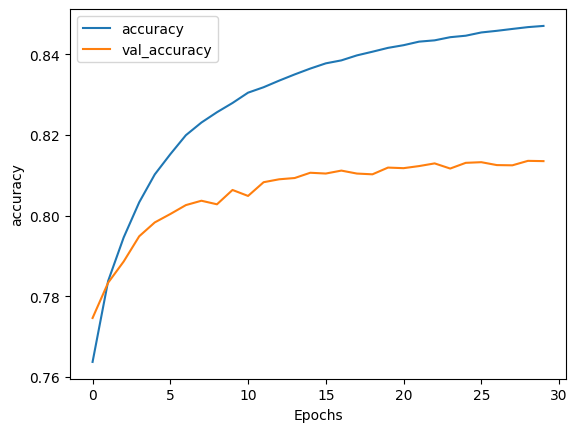

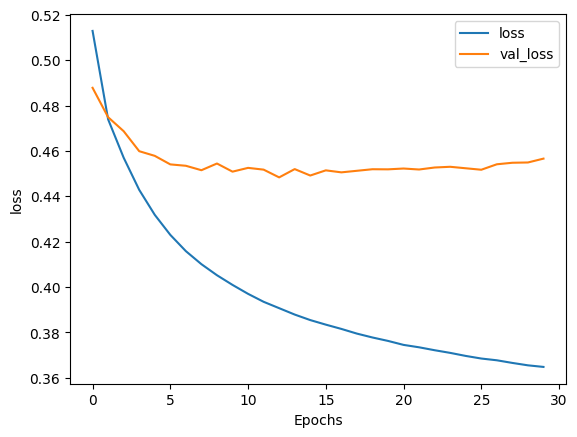

In [56]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_6_history, "accuracy")
plot_graphs(conv_model_3_6_history, "loss")

The model "conv_model_3_6" summary:

1. Training accuracy: 85%
2. Validation accuracy: 81%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [97]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_6", 85, 81, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass
conv_model_3_4             87            82                  4       Pass
conv_model_3_5             86            82                  4       Pass
conv_model_3_6             85            81                  4       Pass


# 3.7 Conv Model

In [57]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
dense_dim = 64 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [58]:
# Build the model
conv_model_3_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_7.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_10  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_20 (Dense)            (None, 64)                2880      
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 44,479
Trainable params: 44,479
Non-trainable params: 0
_________________________________________________

In [59]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_7_history = conv_model_3_7.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5110 - accuracy: 0.7636 - val_loss: 0.4880 - val_accuracy: 0.7723
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4727 - accuracy: 0.7836 - val_loss: 0.4737 - val_accuracy: 0.7830
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4538 - accuracy: 0.7961 - val_loss: 0.4650 - val_accuracy: 0.7908
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4380 - accuracy: 0.8060 - val_loss: 0.4553 - val_accuracy: 0.7977
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4255 - accuracy: 0.8139 - val_loss: 0.4506 - val_accuracy: 0.8019
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4155 - accuracy: 0.8199 - val_loss: 0.4488 - val_accuracy: 0.8038
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4071 - accuracy: 0.8246 - val_loss: 0.4498 - val_accuracy:

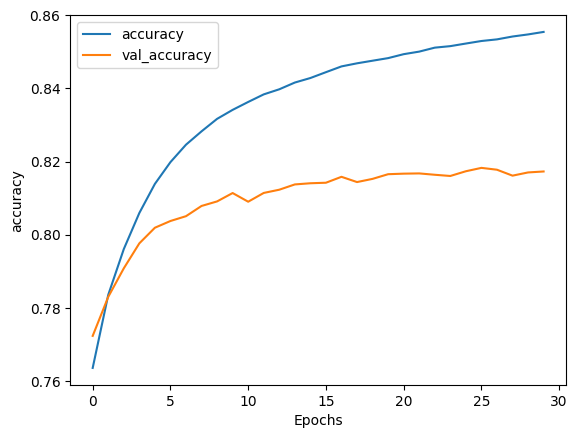

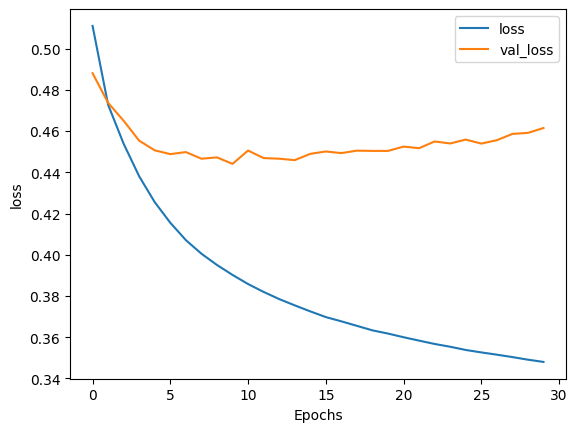

In [60]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_7_history, "accuracy")
plot_graphs(conv_model_3_7_history, "loss")

The model "conv_model_3_7" summary:

1. Training accuracy: 86%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [98]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_7", 86, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass
conv_model_3_4             87            82                  4       Pass
conv_model_3_5             86            82                  4       Pass
conv_model_3_6             85            81                  4       Pass
conv_model_3_7             86            82                  4       Pass


# 3.8 Conv Model

In [61]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
dense_dim = 54 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [62]:
# Build the model
conv_model_3_8 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_8.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_11  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 54)                2430      
                                                                 
 dense_23 (Dense)            (None, 3)                 165       
                                                                 
Total params: 43,999
Trainable params: 43,999
Non-trainable params: 0
_________________________________________________

In [63]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_8_history = conv_model_3_8.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5123 - accuracy: 0.7637 - val_loss: 0.4880 - val_accuracy: 0.7739
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4724 - accuracy: 0.7841 - val_loss: 0.4741 - val_accuracy: 0.7834
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4526 - accuracy: 0.7974 - val_loss: 0.4655 - val_accuracy: 0.7901
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4369 - accuracy: 0.8067 - val_loss: 0.4561 - val_accuracy: 0.7964
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4246 - accuracy: 0.8137 - val_loss: 0.4519 - val_accuracy: 0.8013
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4146 - accuracy: 0.8202 - val_loss: 0.4489 - val_accuracy: 0.8041
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4068 - accuracy: 0.8247 - val_loss: 0.4482 - val_accuracy:

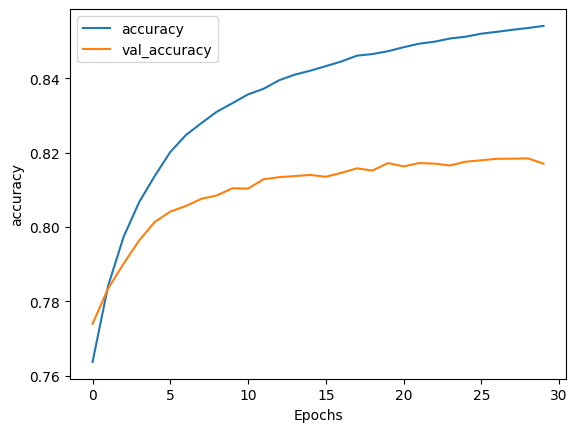

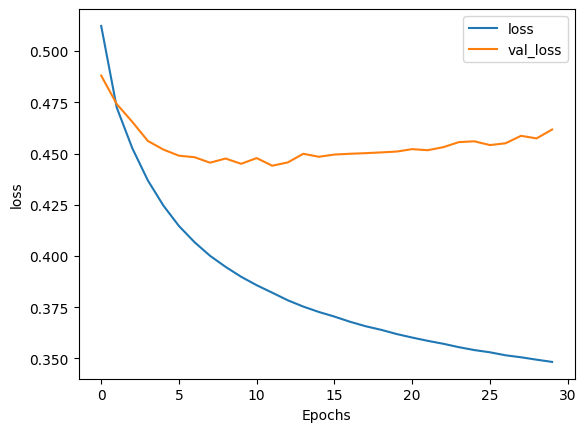

In [64]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_8_history, "accuracy")
plot_graphs(conv_model_3_8_history, "loss")

The model "conv_model_3_8" summary:

1. Training accuracy: 85%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [99]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_8", 85, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass
conv_model_3_4             87            82                  4       Pass
conv_model_3_5             86            82                  4       Pass
conv_model_3_6             85            81                  4       Pass
conv_model_3_7             86            82                  4       Pass
conv_model_3_8             85            82                  4       Pass


# 3.9 Conv Model

In [65]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
dense_dim = 34 # number of units intermediate dense layer
kernel_size = 10 # dimensions of the convolutional filters
maxlen = 10 # length of the input sequences

In [66]:
# Build the model
conv_model_3_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_9.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 44)            22000     
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 44)             19404     
                                                                 
 global_average_pooling1d_12  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_24 (Dense)            (None, 34)                1530      
                                                                 
 dense_25 (Dense)            (None, 3)                 105       
                                                                 
Total params: 43,039
Trainable params: 43,039
Non-trainable params: 0
_________________________________________________

In [67]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_9_history = conv_model_3_9.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.5126 - accuracy: 0.7638 - val_loss: 0.4870 - val_accuracy: 0.7741
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4716 - accuracy: 0.7853 - val_loss: 0.4737 - val_accuracy: 0.7838
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4526 - accuracy: 0.7976 - val_loss: 0.4644 - val_accuracy: 0.7914
Epoch 4/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4376 - accuracy: 0.8068 - val_loss: 0.4561 - val_accuracy: 0.7977
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4255 - accuracy: 0.8139 - val_loss: 0.4515 - val_accuracy: 0.8010
Epoch 6/30
5654/5654 [==============================] - 8s 1ms/step - loss: 0.4156 - accuracy: 0.8199 - val_loss: 0.4499 - val_accuracy: 0.8034
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4081 - accuracy: 0.8246 - val_loss: 0.4478 - val_accuracy:

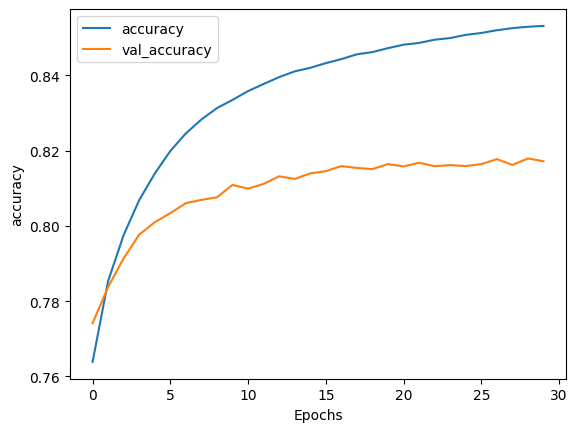

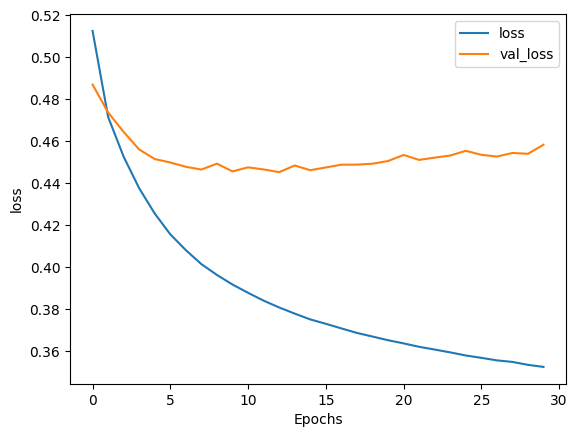

In [68]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_9_history, "accuracy")
plot_graphs(conv_model_3_9_history, "loss")

The model "conv_model_3_9" summary:

1. Training accuracy: 85%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [100]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_9", 85, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  conv_model_3             85            82                  4       Pass
conv_model_3_1             87            82                  4       Pass
conv_model_3_2             86            82                  4       Pass
conv_model_3_3             84            81                  4       Pass
conv_model_3_4             87            82                  4       Pass
conv_model_3_5             86            82                  4       Pass
conv_model_3_6             85            81                  4       Pass
conv_model_3_7             86            82                  4       Pass
conv_model_3_8             85            82                  4       Pass
conv_model_3_9             85            82                  4       Pass


Comment: The training accuracy of conv_model_3_9 has been decreased by 85.3%. It cannot be the best optimized model.

Next, it will attempt to adjust different hyperparameters while the embedding_dim parameter will be set as 64 only.

# 3.10 Conv Model

In [69]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 54 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [70]:
# Build the model
conv_model_3_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_10.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 10, 64)            32000     
                                                                 
 conv1d_13 (Conv1D)          (None, 1, 54)             34614     
                                                                 
 global_average_pooling1d_13  (None, 54)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_26 (Dense)            (None, 44)                2420      
                                                                 
 dense_27 (Dense)            (None, 3)                 135       
                                                                 
Total params: 69,169
Trainable params: 69,169
Non-trainable params: 0
_________________________________________________

In [71]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_10_history = conv_model_3_10.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5081 - accuracy: 0.7654 - val_loss: 0.4841 - val_accuracy: 0.7757
Epoch 2/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4641 - accuracy: 0.7900 - val_loss: 0.4657 - val_accuracy: 0.7896
Epoch 3/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4397 - accuracy: 0.8055 - val_loss: 0.4569 - val_accuracy: 0.7975
Epoch 4/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4199 - accuracy: 0.8169 - val_loss: 0.4468 - val_accuracy: 0.8051
Epoch 5/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4042 - accuracy: 0.8254 - val_loss: 0.4435 - val_accuracy: 0.8097
Epoch 6/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3913 - accuracy: 0.8327 - val_loss: 0.4409 - val_accuracy: 0.8117
Epoch 7/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.3810 - accuracy: 0.8383 - val_loss: 0.4394 - val_ac

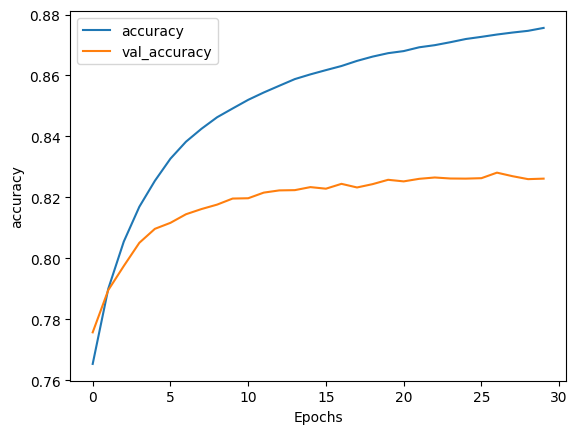

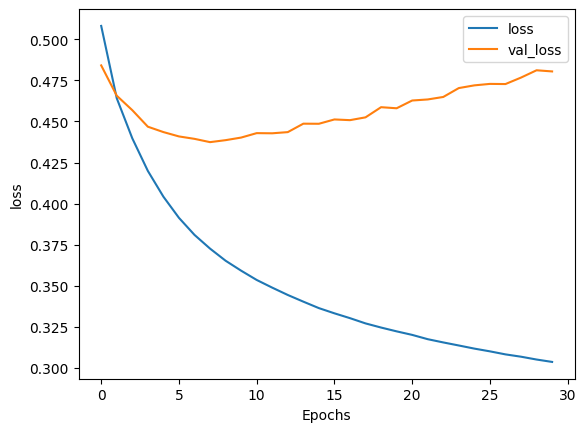

In [72]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_10_history, "accuracy")
plot_graphs(conv_model_3_10_history, "loss")

The model "conv_model_3_10" summary:

1. Training accuracy: 88%
2. Validation accuracy: 83%
3. Total training time: around 5 mins for 30 epochs and 128 batch size.
4. Validation: Fail

In [101]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_10", 88, 83, 5, "Fail")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

         Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   conv_model_3             85            82                  4       Pass
 conv_model_3_1             87            82                  4       Pass
 conv_model_3_2             86            82                  4       Pass
 conv_model_3_3             84            81                  4       Pass
 conv_model_3_4             87            82                  4       Pass
 conv_model_3_5             86            82                  4       Pass
 conv_model_3_6             85            81                  4       Pass
 conv_model_3_7             86            82                  4       Pass
 conv_model_3_8             85            82                  4       Pass
 conv_model_3_9             85            82                  4       Pass
conv_model_3_10             88            83                  5       Fail


# 3.11 Conv Model

In [73]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [74]:
# Build the model
conv_model_3_11 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_11.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 64)            32000     
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 44)             28204     
                                                                 
 global_average_pooling1d_14  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_28 (Dense)            (None, 54)                2430      
                                                                 
 dense_29 (Dense)            (None, 3)                 165       
                                                                 
Total params: 62,799
Trainable params: 62,799
Non-trainable params: 0
_________________________________________________

In [75]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_11_history = conv_model_3_11.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5086 - accuracy: 0.7649 - val_loss: 0.4854 - val_accuracy: 0.7743
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4682 - accuracy: 0.7868 - val_loss: 0.4699 - val_accuracy: 0.7871
Epoch 3/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.4464 - accuracy: 0.8005 - val_loss: 0.4594 - val_accuracy: 0.7943
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4276 - accuracy: 0.8124 - val_loss: 0.4486 - val_accuracy: 0.8022
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4123 - accuracy: 0.8217 - val_loss: 0.4459 - val_accuracy: 0.8060
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4000 - accuracy: 0.8282 - val_loss: 0.4425 - val_accuracy: 0.8099
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3900 - accuracy: 0.8335 - val_loss: 0.4423 - val_accurac

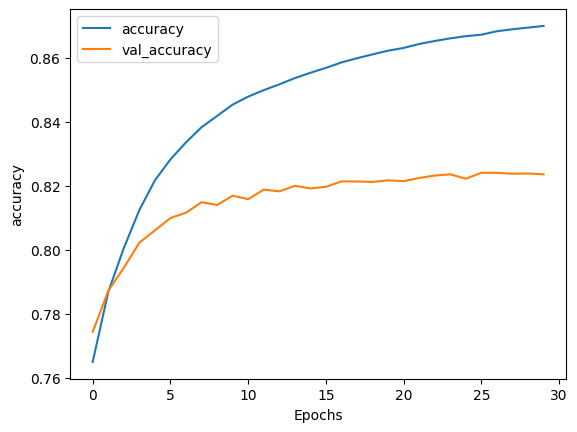

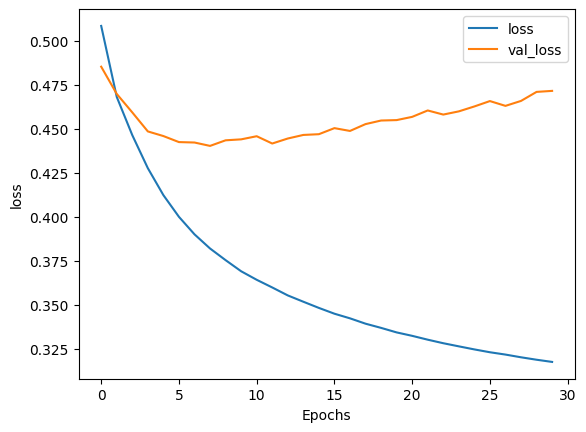

In [76]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_11_history, "accuracy")
plot_graphs(conv_model_3_11_history, "loss")

The model "conv_model_3_11" summary:

1. Training accuracy: 87%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Fail

In [102]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_11", 87, 82, 4, "Fail")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

         Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   conv_model_3             85            82                  4       Pass
 conv_model_3_1             87            82                  4       Pass
 conv_model_3_2             86            82                  4       Pass
 conv_model_3_3             84            81                  4       Pass
 conv_model_3_4             87            82                  4       Pass
 conv_model_3_5             86            82                  4       Pass
 conv_model_3_6             85            81                  4       Pass
 conv_model_3_7             86            82                  4       Pass
 conv_model_3_8             85            82                  4       Pass
 conv_model_3_9             85            82                  4       Pass
conv_model_3_10             88            83                  5       Fail
conv_model_3_11             87            82                  4       Fail


# 3.12 Conv Model

In [77]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
filters = 44 # numbers of learnable parameters set
kernel_size = 10 # dimensions of the convolutional filters
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [78]:
# Build the model
conv_model_3_12 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(filters, kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# Set the traiing parameters
conv_model_3_12.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Print the model summary
conv_model_3_12.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 10, 64)            32000     
                                                                 
 conv1d_15 (Conv1D)          (None, 1, 44)             28204     
                                                                 
 global_average_pooling1d_15  (None, 44)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_30 (Dense)            (None, 34)                1530      
                                                                 
 dense_31 (Dense)            (None, 3)                 105       
                                                                 
Total params: 61,839
Trainable params: 61,839
Non-trainable params: 0
_________________________________________________

In [79]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model 
conv_model_3_12_history = conv_model_3_12.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 10s 2ms/step - loss: 0.5092 - accuracy: 0.7653 - val_loss: 0.4836 - val_accuracy: 0.7767
Epoch 2/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4657 - accuracy: 0.7891 - val_loss: 0.4681 - val_accuracy: 0.7882
Epoch 3/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4424 - accuracy: 0.8040 - val_loss: 0.4562 - val_accuracy: 0.7975
Epoch 4/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4240 - accuracy: 0.8148 - val_loss: 0.4482 - val_accuracy: 0.8021
Epoch 5/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.4095 - accuracy: 0.8229 - val_loss: 0.4457 - val_accuracy: 0.8062
Epoch 6/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3985 - accuracy: 0.8291 - val_loss: 0.4455 - val_accuracy: 0.8089
Epoch 7/30
5654/5654 [==============================] - 9s 2ms/step - loss: 0.3895 - accuracy: 0.8339 - val_loss: 0.4415 - val_accuracy

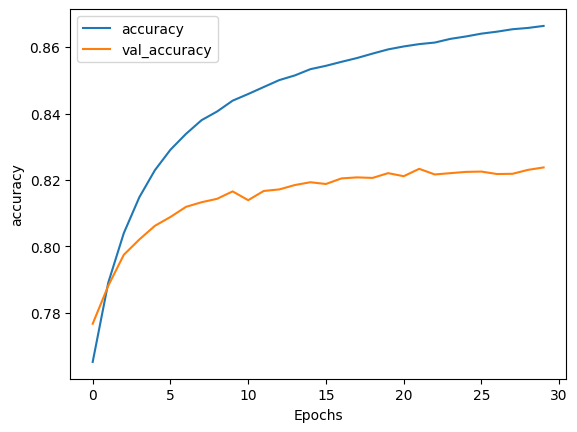

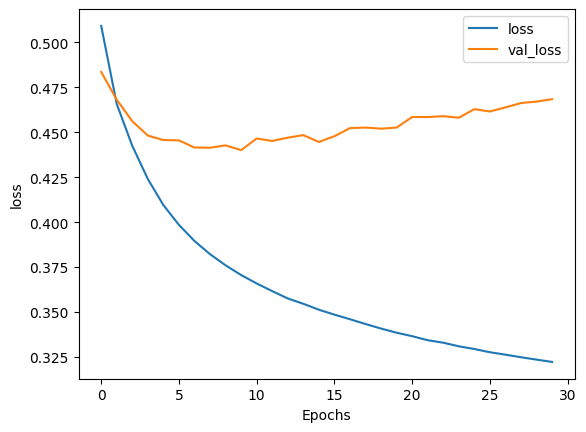

In [80]:
# Plot the accuracy and results 
plot_graphs(conv_model_3_12_history, "accuracy")
plot_graphs(conv_model_3_12_history, "loss")

The model "conv_model_3_12" summary:

1. Training accuracy: 87%
2. Validation accuracy: 82%
3. Total training time: around 4 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [103]:
# Call the function to add a new row
df_opt_models = add_row(df_opt_models, "conv_model_3_12", 87, 82, 4, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

         Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   conv_model_3             85            82                  4       Pass
 conv_model_3_1             87            82                  4       Pass
 conv_model_3_2             86            82                  4       Pass
 conv_model_3_3             84            81                  4       Pass
 conv_model_3_4             87            82                  4       Pass
 conv_model_3_5             86            82                  4       Pass
 conv_model_3_6             85            81                  4       Pass
 conv_model_3_7             86            82                  4       Pass
 conv_model_3_8             85            82                  4       Pass
 conv_model_3_9             85            82                  4       Pass
conv_model_3_10             88            83                  5       Fail
conv_model_3_11             87            82                  4       Fail
conv_model_3_12          

Overall, conv_model_3_1 is the accurate and efficient model after optimization.

In [104]:
# Save the fitted LSTM model to a file
model_save_path = "models/conv_model_3_1.h5"
conv_model_3_1.save(model_save_path)